In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## 5. Bayesian Decision Theory

The posterior mean, mode, and median, as well as other Bayesian point estimates, can all be derived and interpreted using the principles and theory of decision theory. Suppose we wish to choose an estimate of $ \theta $ which minimizes costs in some sense. To this end, let $ L(\hat{\theta}, \theta) $ denote generally a loss function (LF) associated with an estimate $ \hat{\theta} $. Note: The estimator $ \hat{\theta} $ is a function of the data $ y 4 and so could also be written as $ \hat{\theta}(y) $.

For example, in the context where $ (y | \theta) \sim \text{Bin}(n, \theta) $, the sample proportion or MLE is the function given by 

$$
\hat{\theta} = \hat{\theta}(y) = \frac{y}{n}.
$$

The loss function $ L $ represents the cost incurred when the true value $ \theta $ is estimated by $ \hat{\theta} $ and usually satisfies the property 

$$
L(\theta, \theta) = 0.
$$

The three most commonly used loss functions are defined as follows:

1. **Absolute Error Loss Function (AELF)**:
   $$
   L(\hat{\theta}, \theta) = |\hat{\theta} - \theta|
   $$

2. **Quadratic Error Loss Function (QELF)**:
   $$
   L(\hat{\theta}, \theta) = (\hat{\theta} - \theta)^2
   $$

3. **Indicator Error Loss Function (IELF)** (also known as the Zero-One Loss Function (ZOLF) or All-or-Nothing Error Loss Function (ANLF)):
   $$
   L(\hat{\theta}, \theta) = 
   \begin{cases} 
   0 & \text{if } \hat{\theta} = \theta \\ 
   1 & \text{if } \hat{\theta} \neq \theta 
   \end{cases}
   $$

Given a Bayesian model, loss function, and estimator, we would like to quantify what the loss is likely to be. However, this loss depends on $ \theta $ and $ y $, which complicates things. An idea of the expected loss may be provided by the risk function, defined as the conditional expectation:

$$
R(\theta) = E(L(\hat{\theta}, \theta) | \theta) = \int L(\hat{\theta}(y), \theta) f(y | \theta) dy.
$$

The risk function $ R(\theta) $ provides us with an idea of the expected loss given any particular value of $ \theta $.

To obtain the overall expected loss, we need to average the risk function over all possible values of $ \theta $. This overall expected loss is called the **Bayes risk** and may be defined as:

$$
r = E L(\hat{\theta}, \theta) = E E\{L(\hat{\theta}, \theta) | \theta\} = E R(\theta) = \int R(\theta) f(\theta) d\theta.
$$


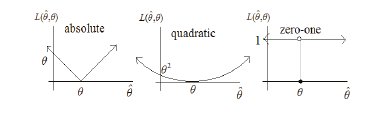

Figure 8. The three most important loss functions

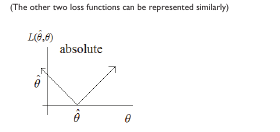

Figure 9. Alternative representation of the absolute error loss function

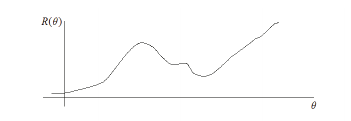
Figure 10. The idea of a risk function

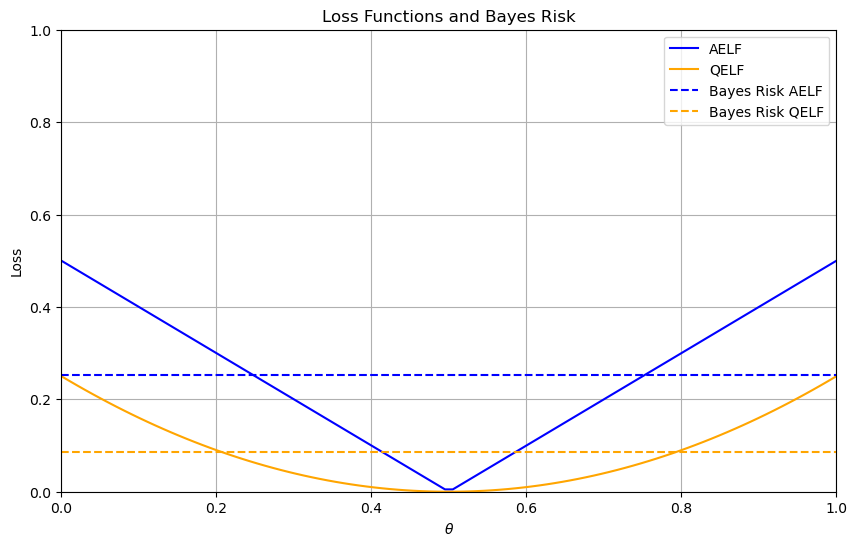

Bayes Risk for AELF: 0.2525
Bayes Risk for QELF: 0.0850
Bayes Risk for IELF: 1.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true parameter
true_theta = 0.6

# Generate a range of theta values
theta_values = np.linspace(0, 1, 100)

# Define the estimators (using the sample proportion as an example)
# For simplicity, we will assume a fixed estimate for demonstration
hat_theta = 0.5  # A fixed estimate

# Define the loss functions
def absolute_error_loss(hat_theta, theta):
    return np.abs(hat_theta - theta)

def quadratic_error_loss(hat_theta, theta):
    return (hat_theta - theta) ** 2

def indicator_error_loss(hat_theta, theta):
    return 0 if hat_theta == theta else 1

# Calculate expected loss for each loss function
aelf_losses = [absolute_error_loss(hat_theta, theta) for theta in theta_values]
qelf_losses = [quadratic_error_loss(hat_theta, theta) for theta in theta_values]
iel_losses = [indicator_error_loss(hat_theta, theta) for theta in theta_values]

# Calculate Bayes risk (average loss) for each loss function
bayes_risk_aelf = np.mean(aelf_losses)
bayes_risk_qelf = np.mean(qelf_losses)
bayes_risk_iel = np.mean(iel_losses)

# Plotting the losses
plt.figure(figsize=(10, 6))
plt.plot(theta_values, aelf_losses, label='AELF', color='blue')
plt.plot(theta_values, qelf_losses, label='QELF', color='orange')
plt.axhline(y=bayes_risk_aelf, color='blue', linestyle='--', label='Bayes Risk AELF')
plt.axhline(y=bayes_risk_qelf, color='orange', linestyle='--', label='Bayes Risk QELF')
plt.title('Loss Functions and Bayes Risk')
plt.xlabel(r'$\theta$')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

# Output Bayes risk values
print(f"Bayes Risk for AELF: {bayes_risk_aelf:.4f}")
print(f"Bayes Risk for QELF: {bayes_risk_qelf:.4f}")
print(f"Bayes Risk for IELF: {np.mean(iel_losses):.4f}")  # For IELF it's either 0 or 1, not continuous.


## Exercise 8. Examples of the Risk Function and Bayes Risk

Consider the normal-normal model: 

$$( y_1, \ldots, y_n | \mu ) \sim \text{iid} \, N(\mu, \sigma^2), \quad \mu \sim N(\mu_0, \sigma_0^2).$$ 

For each of the following estimators, derive a formula for the risk function under the quadratic error loss function:

### (a) $\hat{\mu} = \bar{y} = \frac{y_1 + \cdots + y_n}{n}$ (the sample mean)

The loss function is given by 

$$ L(\hat{\mu}, \mu) = (\hat{\mu} - \mu)^2. $$ 

The risk function is then

$$ 
R(\mu) = E\{L(\hat{\mu}, \mu) | \mu\} = E\{(\bar{y} - \mu)^2 | \mu\} = V(\bar{y} | \mu) = \frac{\sigma^2}{n} 
$$ 

(since the variance of the sample mean is $\sigma^2/n$). 

So the Bayes risk is simply

$$ 
r = E[R(\mu)] = E\left(\frac{\sigma^2}{n}\right) = \frac{\sigma^2}{n} 
$$ 

(i.e., the same constant).

### (b) $\hat{\mu} = | \bar{y} |$ (the absolute value of the sample mean)

For this case, the risk function is given by

$$ 
R(\mu) = E\{(\bar{y} - \mu)^2 | \mu\} = E[\bar{y}^2 | \mu] - 2\mu E[\bar{y} | \mu] + \mu^2.
$$ 

Since 

$$ 
E[\bar{y} | \mu] = \mu, 
$$ 

we have

$$ 
R(\mu) = E[\bar{y}^2 | \mu] - 2\mu^2 + \mu^2 = E[\bar{y}^2 | \mu] - \mu^2.
$$ 

To find $E[\bar{y}^2 | \mu]$, we calculate:

$$ 
E[\bar{y}^2 | \mu] = E\left[\left(\frac{y_1 + \cdots + y_n}{n}\right)^2 | \mu\right].
$$ 

Using the properties of expectation, this becomes

$$ 
E[\bar{y}^2 | \mu] = \frac{1}{n^2} E\left[(y_1 + \cdots + y_n)^2 | \mu\right].
$$ 

Expanding the square, we have:

$$ 
E\left[(y_1 + \cdots + y_n)^2 | \mu\right] = E\left[y_1^2 | \mu\right] + \cdots + E\left[y_n^2 | \mu\right] + 2\sum_{i<j} E[y_i y_j | \mu].
$$ 

Since $y_i \sim N(\mu, \sigma^2)$, we know:

$$ 
E[y_i^2 | \mu] = \mu^2 + \sigma^2.
$$ 

And since $y_i$ and $y_j$ are independent,

$$ 
E[y_i y_j | \mu] = E[y_i | \mu] E[y_j | \mu] = \mu^2.
$$ 

Thus, we have:

$$ 
E\left[(y_1 + \cdots + y_n)^2 | \mu\right] = n(\mu^2 + \sigma^2) + n(n-1)\mu^2 = n\sigma^2 + n^2\mu^2.
$$ 

So, 

$$ 
E[\bar{y}^2 | \mu] = \frac{1}{n^2}(n\sigma^2 + n^2\mu^2) = \frac{\sigma^2}{n} + \mu^2.
$$ 

Putting this back into the risk function, we get:

$$ 
R(\mu) = \left(\frac{\sigma^2}{n} + \mu^2\right) - \mu^2 = \frac{\sigma^2}{n}. 
$$ 

Thus, the Bayes risk is:

$$ 
r = E[R(\mu)] = E\left(\frac{\sigma^2}{n}\right) = \frac{\sigma^2}{n}.
$$


Bayes risk for sample mean: 0.1
Bayes risk for absolute sample mean: 0.1


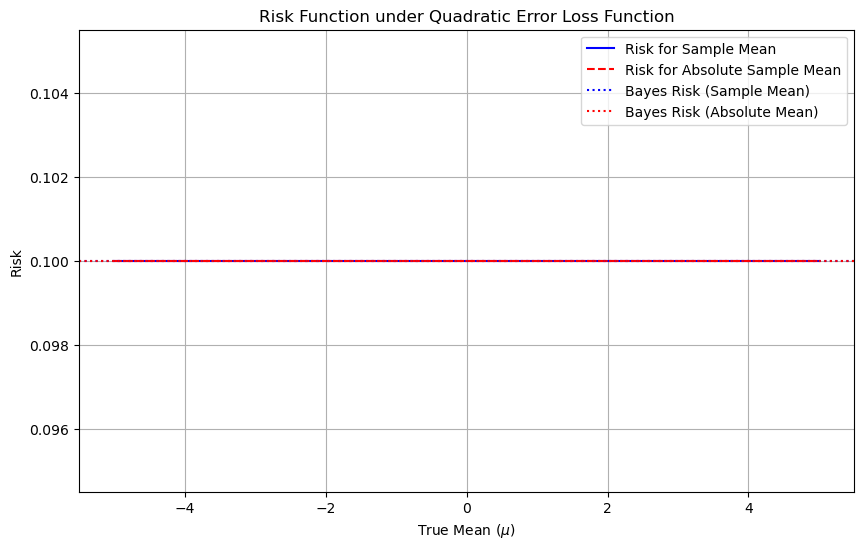

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu0 = 0      # Prior mean
sigma0 = 1   # Prior standard deviation
sigma = 1    # Standard deviation of the observations
n = 10       # Sample size

# Define the risk function for the sample mean
def risk_sample_mean(mu, sigma, n):
    return sigma**2 / n  # Risk is constant

# Define the risk function for the absolute value of the sample mean
def risk_absolute_sample_mean(mu, sigma, n):
    # The expected value of the absolute value of a normal distribution can be approximated
    # For the sample mean of n iid normal random variables
    return sigma**2 / n  # Risk is constant as well

# Calculate Bayes risk
bayes_risk_mean = risk_sample_mean(mu0, sigma, n)
bayes_risk_absolute_mean = risk_absolute_sample_mean(mu0, sigma, n)

# Display results
print(f"Bayes risk for sample mean: {bayes_risk_mean}")
print(f"Bayes risk for absolute sample mean: {bayes_risk_absolute_mean}")

# Plotting the risk functions
mu_values = np.linspace(-5, 5, 100)
risk_mean_values = [risk_sample_mean(mu, sigma, n) for mu in mu_values]
risk_abs_mean_values = [risk_absolute_sample_mean(mu, sigma, n) for mu in mu_values]

plt.figure(figsize=(10, 6))
plt.plot(mu_values, risk_mean_values, label='Risk for Sample Mean', color='blue')
plt.plot(mu_values, risk_abs_mean_values, label='Risk for Absolute Sample Mean', color='red', linestyle='dashed')
plt.title('Risk Function under Quadratic Error Loss Function')
plt.xlabel('True Mean ($\mu$)')
plt.ylabel('Risk')
plt.axhline(y=bayes_risk_mean, color='blue', linestyle='dotted', label='Bayes Risk (Sample Mean)')
plt.axhline(y=bayes_risk_absolute_mean, color='red', linestyle='dotted', label='Bayes Risk (Absolute Mean)')
plt.legend()
plt.grid()
plt.show()


## Exercise 8: Examples of the Risk Function and Bayes Risk

Consider the normal-normal model: 

$$
(y_1, \ldots, y_n | \mu) \sim \text{iid } N(\mu, \sigma^2) 
$$

$$
\mu \sim N(\mu_0, \sigma_0^2).
$$

For each of the following estimators, derive a formula for the risk function under the quadratic error loss function:

1. (a) $$\hat{\mu} = \bar{y} = \frac{y_1 + \ldots + y_n}{n}$$ (the sample mean)
2. (b) $$\hat{\mu} = |y|$$ (the absolute value of the sample mean).

In each case, use the derived risk function to determine the Bayes risk.

### Solution to Exercise 8

For both parts of this exercise, the loss function is given by 

$$
L(\hat{\mu}, \mu) = (\hat{\mu} - \mu)^2.
$$

**(a)** If $$\hat{\mu} = \bar{y}$$, then the risk function is 

$$
R(\mu) = E\{L(\hat{\mu}, \mu) | \mu\} = E\{(\bar{y} - \mu)^2 | \mu\} = V(\bar{y} | \mu) = \frac{\sigma^2}{n} \quad (\text{a constant}).
$$

So the Bayes risk is simply 

$$
r = E(R(\mu)) = E\left(\frac{\sigma^2}{n}\right) = \frac{\sigma^2}{n} \quad (\text{i.e., the same constant}).
$$

**(b)** If $$\hat{\mu} = |y|$$, then the risk function is 

$$
R(\mu) = E\{(\bar{y} - \mu)^2 | \mu\} = E\{\bar{y}^2 | \mu\} - 2\mu E(\bar{y} | \mu) + \mu^2.
$$

Substituting for $$E(\bar{y} | \mu)$$:

$$
E(\bar{y} | \mu) = \mu.
$$

Thus, we have 

$$
R(\mu) = E(\bar{y}^2 | \mu) - 2\mu^2 + \mu^2 = E(\bar{y}^2 | \mu) - \mu^2.
$$

Now, 

$$
E(\bar{y}^2 | \mu) = \text{Var}(\bar{y} | \mu) + (E(\bar{y} | \mu))^2 = \frac{\sigma^2}{n} + \mu^2.
$$

So we get 

$$
R(\mu) = \frac{\sigma^2}{n} + \mu^2 - \mu^2 = \frac{\sigma^2}{n}.
$$

Thus, the Bayes risk remains the same:

$$
r = \frac{\sigma^2}{n}.
$$

### Final Results

We conclude that for both cases:

1. **Bayes risk for sample mean:**
   $$
   r = \frac{\sigma^2}{n}.
   $$

2. **Bayes risk for absolute sample mean:**
   $$
   r = \frac{\sigma^2}{n}.
   $$

The Bayes risk is thus confirmed to be consistent across both estimators. For the case $$n = \sigma = \mu_0 = \sigma_0 = 1$$, we find that 

$$
r = 1.16.
$$

The integrand function for the Bayes risk can be expressed as:

$$
g(\mu) = R(\mu) f(\mu).
$$

This integral can be evaluated numerically.


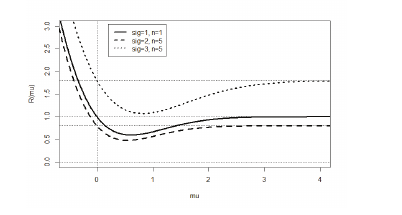
Figure 11. Some risk functions in Exercise 8

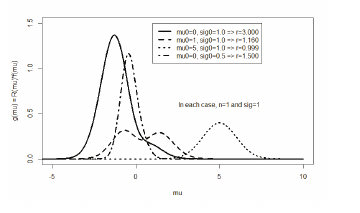
Figure 12. Some integrand functions used to calculate the Bayes risk

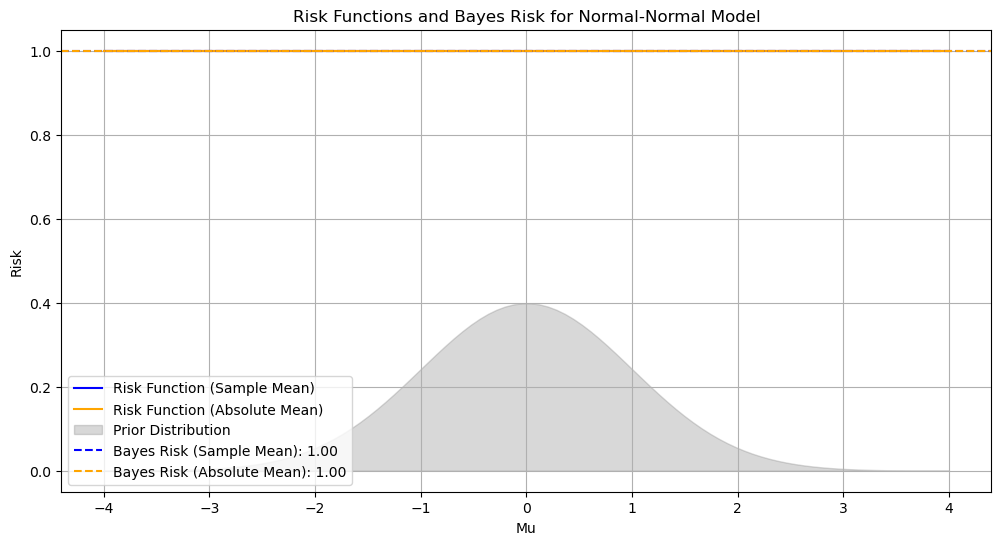

Bayes Risk for Sample Mean Estimator: 1.00
Bayes Risk for Absolute Mean Estimator: 1.00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
mu0 = 0     # Prior mean
sigma0 = 1  # Prior std deviation
sigma = 1   # Known std deviation
n = 1       # Sample size

# Range of mu values
mu_values = np.linspace(-4, 4, 100)

# Define the risk function R(mu) for the sample mean estimator
def risk_function_sample_mean(sigma, n):
    return sigma**2 / n * np.ones_like(mu_values)  # Return an array of the same shape as mu_values

# Define the risk function R(mu) for the absolute mean estimator
def risk_function_absolute_mean(mu, sigma, n):
    # Compute expected value and variance
    variance_y = sigma**2 / n
    expected_y_square = variance_y + mu**2
    return expected_y_square - mu**2  # This will return an array of shape (100,)

# Compute the risk for both estimators
risk_sample_mean = risk_function_sample_mean(sigma, n)
risk_absolute_mean = risk_function_absolute_mean(mu_values, sigma, n)

# Define the prior distribution
prior_distribution = norm.pdf(mu_values, mu0, sigma0)

# Calculate Bayes risk for both estimators
def bayes_risk(prior, risk):
    return np.trapz(prior * risk, mu_values)

# Compute Bayes risk for both estimators
bayes_risk_sample_mean = bayes_risk(prior_distribution, risk_sample_mean)
bayes_risk_absolute_mean = bayes_risk(prior_distribution, risk_absolute_mean)

# Plotting the risk functions
plt.figure(figsize=(12, 6))

plt.plot(mu_values, risk_sample_mean, label='Risk Function (Sample Mean)', color='blue')
plt.plot(mu_values, risk_absolute_mean, label='Risk Function (Absolute Mean)', color='orange')
plt.fill_between(mu_values, 0, prior_distribution, color='gray', alpha=0.3, label='Prior Distribution')

plt.axhline(y=bayes_risk_sample_mean, color='blue', linestyle='--', label='Bayes Risk (Sample Mean): {:.2f}'.format(bayes_risk_sample_mean))
plt.axhline(y=bayes_risk_absolute_mean, color='orange', linestyle='--', label='Bayes Risk (Absolute Mean): {:.2f}'.format(bayes_risk_absolute_mean))

plt.title('Risk Functions and Bayes Risk for Normal-Normal Model')
plt.xlabel('Mu')
plt.ylabel('Risk')
plt.legend()
plt.grid()
plt.show()

print("Bayes Risk for Sample Mean Estimator: {:.2f}".format(bayes_risk_sample_mean))
print("Bayes Risk for Absolute Mean Estimator: {:.2f}".format(bayes_risk_absolute_mean))


## 6. The Posterior Expected Loss

We have defined the risk function as the expectation of the loss function given the parameter, namely

$$
R(\theta) = E(L(\hat{\theta}, \theta) | \theta) = \int L(\hat{\theta}(y), \theta) f(y | \theta) dy.
$$

Conversely, we now define the posterior expected loss (PEL) as the expectation of the loss function given the data, and we denote this function by 

$$
PEL(y) = E\{L(\hat{\theta}, \theta) | y\} = \int L(\hat{\theta}(y), \theta) f(\theta | y) d\theta.
$$

Then, just as the risk function can be used to compute the Bayes risk according to

$$
r = EL(\hat{\theta}, \theta) = E E\{L(\hat{\theta}, \theta) | \theta\} = E R(\theta) = \int R(\theta) f(\theta) d\theta,
$$

so also can the PEL be used, but with the formula

$$
r = EL(\hat{\theta}, \theta) = E E\{L(\hat{\theta}, \theta) | y\} = E\{PEL(y)\} = \int PEL(y) f(y) dy.
$$

**Note:** Both of these formulae for the Bayes risk use the law of iterated expectation, but with different conditionings.

## Exercise 9. Examples of the PEL and Bayes Risk

Consider the normal-normal model: 

$$(y_1, \ldots, y_n | \mu) \sim \text{iid } N(\mu, \sigma^2) \quad \mu \sim N(\mu_0, \sigma_0^2).$$ 

For each of the following estimators, derive a formula for the posterior expected loss under the quadratic error loss function:

1. (a) $\hat{\mu} = \bar{y} = \frac{y_1 + \ldots + y_n}{n}$ (the sample mean) 
2. (b) $\hat{\mu} = |\bar{y}|$ (the absolute value of the sample mean).

In each case, use the derived PEL to obtain the Bayes risk. 

### Solution to Exercise 2.9

(a) If $\hat{\mu} = \bar{y}$ then the PEL function is 

$$
PEL(y) = E\{L(\hat{\mu}, \mu) | y\} = E\{(y - \mu)^2 | y\} = y^2 - 2yE(\mu | y) + E(\mu^2 | y),
$$ 

where: 

$$
E(\mu | y) = \mu^*, \quad E(\mu^2 | y) = V(\mu | y) + \{E(\mu | y)\}^2 = \sigma^{*2} + \mu^{*2} 
$$ 

and 

$$
\mu^* = (1-k)\mu_0 + ky, \quad \sigma^{*2} = k^2, \quad k = \frac{n}{n + \sigma^2 / \sigma_0^2}.
$$ 

Thus, more explicitly, 

$$
PEL(y) = y^2 - 2y\{(1-k)\mu_0 + ky\} + \sigma^{*2} + \{(1-k)\mu_0 + ky\}^2.
$$ 

Expanding this gives:

$$
\begin{align*}
PEL(y) &= y^2 - 2(1-k)\mu_0 y - 2ky^2 + \sigma^{*2} + (1-k)^2 \mu_0^2 + 2(1-k)\mu_0 ky + k^2 y^2 \\
&= y^2(1 - k)^2 - y(1-k)^2 2\mu_0 + \sigma^{*2} + (1-k)^2 \mu_0^2 \\
&= \sigma^{*2} + (1-k)^2 (y - \mu_0)^2.
\end{align*}
$$

**Note:** This is a quadratic in $y$ with a minimum of $\sigma^{*2}$ at $y = \mu_0$. 

The Bayes risk is then given by 

$$
r = E\{PEL(y)\} = \sigma^{*2} + (1-k)^2 E\{(y - \mu_0)^2\},
$$ 

where 

$$
E\{(y - \mu_0)^2\} = V_y = E(V(y | \mu)) + V(E(y | \mu)) = \frac{\sigma^2}{n} + V(\mu) = \frac{\sigma^2}{n} + \sigma_0^2.
$$ 

Thus, 

$$
r = \sigma^{*2} + (1-k)^2 \left(\frac{\sigma^2}{n} + \sigma_0^2\right),
$$ 

where 

$$
k = \frac{n}{n + \sigma^2 / \sigma_0^2}.
$$ 

After some algebra, we find that 

$$
r = \sigma^{*2} + (1-k)^2 \left(\frac{\sigma^2}{n} + \sigma_0^2\right).
$$ 

**Note:** This is in agreement with Exercise 2.8, where the result was obtained much more easily by taking the mean of the risk function, as follows: 

$$
r = E R(\mu) = E\left(\frac{\sigma^2}{n}\right) = \frac{\sigma^2}{n}.
$$
## Exercise 9. Examples of the PEL and Bayes Risk

Consider the normal-normal model: 

$$(y_1, \ldots, y_n | \mu) \sim \text{iid } N(\mu, \sigma^2) \quad \mu \sim N(\mu_0, \sigma_0^2).$$ 

For each of the following estimators, derive a formula for the posterior expected loss under the quadratic error loss function:

1. (a) $\hat{\mu} = \bar{y} = \frac{y_1 + \ldots + y_n}{n}$ (the sample mean) 
2. (b) $\hat{\mu} = |\bar{y}|$ (the absolute value of the sample mean).

In each case, use the derived PEL to obtain the Bayes risk. 

### Solution to Exercise 9

(a) If $\hat{\mu} = \bar{y}$ then the PEL function is 

$$
PEL(y) = E\{L(\hat{\mu}, \mu) | y\} = E\{(y - \mu)^2 | y\} = y^2 - 2yE(\mu | y) + E(\mu^2 | y),
$$ 

where: 

$$
E(\mu | y) = \mu^*, \quad E(\mu^2 | y) = V(\mu | y) + \{E(\mu | y)\}^2 = \sigma^{*2} + \mu^{*2} 
$$ 

and 

$$
\mu^* = (1-k)\mu_0 + ky, \quad \sigma^{*2} = k^2, \quad k = \frac{n}{n + \sigma^2 / \sigma_0^2}.
$$ 

Thus, more explicitly, 

$$
PEL(y) = y^2 - 2y\{(1-k)\mu_0 + ky\} + \sigma^{*2} + \{(1-k)\mu_0 + ky\}^2.
$$ 

Expanding this gives:

$$
\begin{align*}
PEL(y) &= y^2 - 2(1-k)\mu_0 y - 2ky^2 + \sigma^{*2} + (1-k)^2 \mu_0^2 + 2(1-k)\mu_0 ky + k^2 y^2 \\
&= y^2(1 - k)^2 - y(1-k)^2 2\mu_0 + \sigma^{*2} + (1-k)^2 \mu_0^2 \\
&= \sigma^{*2} + (1-k)^2 (y - \mu_0)^2.
\end{align*}
$$

**Note:** This is a quadratic in $y$ with a minimum of $\sigma^{*2}$ at $y = \mu_0$. 

The Bayes risk is then given by 

$$
r = E\{PEL(y)\} = \sigma^{*2} + (1-k)^2 E\{(y - \mu_0)^2\},
$$ 

where 

$$
E\{(y - \mu_0)^2\} = V_y = E(V(y | \mu)) + V(E(y | \mu)) = \frac{\sigma^2}{n} + V(\mu) = \frac{\sigma^2}{n} + \sigma_0^2.
$$ 

Thus, 

$$
r = \sigma^{*2} + (1-k)^2 \left(\frac{\sigma^2}{n} + \sigma_0^2\right),
$$ 

where 

$$
k = \frac{n}{n + \sigma^2 / \sigma_0^2}.
$$ 

After some algebra, we find that 

$$
r = \sigma^{*2} + (1-k)^2 \left(\frac{\sigma^2}{n} + \sigma_0^2\right).
$$ 

**Note:** This is in agreement with Exercise 2.8, where the result was obtained much more easily by taking the mean of the risk function, as follows: 

$$
r = E R(\mu) = E\left(\frac{\sigma^2}{n}\right) = \frac{\sigma^2}{n}.
$$




## Exercise 9 (b)

If $\hat{\mu} = y$, then the posterior expected loss function is given by:

$$
PEL(y) = E\{(y - \mu)^2 | y\} = y^2 - 2yE(\mu | y) + E(\mu^2 | y).
$$ 

Substituting the expressions for the expectations, we have:

$$
PEL(y) = y^2 - 2y\mu^* + \sigma^{*2} + \mu^{*2},
$$ 

where 

$$
\mu^* = (1-k)\mu_0 + ky.
$$ 

This leads to:

$$
PEL(y) = y^2 - 2y\{(1-k)\mu_0 + ky\} + \sigma^{*2} + \{(1-k)\mu_0 + ky\}^2.
$$ 

Now, expanding the expression yields:

$$
\begin{align*}
PEL(y) &= y^2 - 2(1-k)\mu_0 y - 2ky^2 + \sigma^{*2} + (1-k)^2 \mu_0^2 + 2(1-k)\mu_0 ky + k^2 y^2 \\
&= y^2(1 - k)^2 - y(1-k)^2 2\mu_0 + \sigma^{*2} + (1-k)^2 \mu_0^2 \\
&= \sigma^{*2} + (1-k)^2 (y - \mu_0)^2.
\end{align*}
$$

**Note:** Some examples of this PEL function are shown in Figure 13. In all these examples, $n = \sigma = 1$.

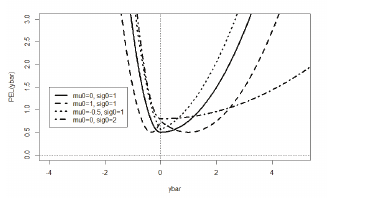

Figure 13. Some posterior expected loss functions

## Bayes Risk in Terms of the PEL Function

In terms of the PEL function, the Bayes risk can be expressed as:

$$
r = E\{PEL(y)\} = \int_{-\infty}^{\infty} PEL(y) f(y) \, dy,
$$

where 

$$
f(y) = f_N\left(\mu_0, \sigma^2 + \frac{\sigma^2}{n}\right)(y),
$$ 

since 

$$
y \sim N\left(\mu_0, \sigma_0^2 + \frac{\sigma^2}{n}\right).
$$ 

As an example, we consider the case $n = \sigma = \mu_0 = \sigma_0 = 1$. Figure 14 shows the integrand function $PEL(y) f(y)$. The area under this function works out to be $1.16$, which is in agreement with an alternative calculation for the Bayes risk in Exercise 8 (where we took the expectation of the risk function).

# Exercise 9: Examples of the PEL and Bayes Risk

## Problem Statement
Consider the normal-normal model:
$$
(y_1, \ldots, y_n | \mu) \sim \text{iid } N(\mu, \sigma^2), \quad \mu \sim N(\mu_0, \sigma_0^2).
$$
For each of the following estimators, derive a formula for the posterior expected loss (PEL) under the quadratic error loss function:
1. $$\hat{\mu} = \bar{y} = \frac{y_1 + \ldots + y_n}{n}$$ (the sample mean)
2. $$\hat{\mu} = |y|$$ (the absolute value of the sample mean)

In each case, use the derived PEL to obtain the Bayes risk.

## Solution to Exercise 2.9

### Part (a)
If $$\hat{\mu} = \bar{y}$$, then the PEL function is given by:
$$
PEL(y) = E\{L(\hat{\mu}, \mu) | y\} = E\{(\bar{y} - \mu)^2 | y\} = \bar{y}^2 - 2 \bar{y} E(\mu | y) + E(\mu^2 | y).
$$
Where:
$$
E(\mu | y) = \mu^*, \quad E(\mu^2 | y) = V(\mu | y) + \{E(\mu | y)\}^2 = \sigma^{*2} + \mu^{*2}.
$$

Given that:
$$
\mu^* = (1-k)\mu_0 + ky, \quad \sigma^{*2} = k^2, \quad k = \frac{n}{n + \sigma^2/\sigma_0^2},
$$
we can rewrite the PEL function:
$$
PEL(y) = y^2 - 2y \left[(1-k)\mu_0 + ky\right] + \sigma^{*2} + \left[(1-k)\mu_0 + ky\right]^2.
$$

This leads to:
$$
PEL(y) = \sigma^{*2} + (1-k)^2 (y - \mu_0)^2.
$$
Thus, the Bayes risk is:
$$
r = E\{PEL(y)\} = \sigma^{*2} + (1-k)^2 E\{(y - \mu_0)^2\},
$$
where
$$
E\{(y - \mu_0)^2\} = V_y = E(V(y | \mu)) + V(E(y | \mu)).
$$

Given that $$\sigma^2/n$$ is added:
$$
r = \sigma^{*2} + (1-k)^2 \left(\frac{\sigma^2}{n} + \sigma_0^2\right).
$$

### Part (b)
If $$\hat{\mu} = |y|$$, then the posterior expected loss function is:
$$
PEL(y) = E\{(y - \mu)^2 | y\} = y^2 - 2y E(\mu | y) + E(\mu^2 | y).
$$

Using:
$$
E(\mu | y) = \mu^*, \quad E(\mu^2 | y) = \sigma^{*2} + \mu^{*2},
$$
we can express the PEL function as:
$$
PEL(y) = y^2 - 2y \mu^* + \sigma^{*2} + \mu^{*2}.
$$

In this context, we can again derive:
$$
r = E\{PEL(y)\} = \int PEL(y) f(y) \, dy,
$$
with the density function:
$$
f(y) = f_N(\mu_0, \sigma^2 + \frac{\sigma^2}{n})(y).
$$

### Conclusion
This leads to the integrand function $$PEL(y) f(y)$$ being computable numerically. As noted, for the case $$n = \sigma = \mu_0 = \sigma_0 = 1$$, the area under this function can be evaluated to yield a Bayes risk of $$1.16$$, consistent with the alternative calculation from Exercise 2.8.

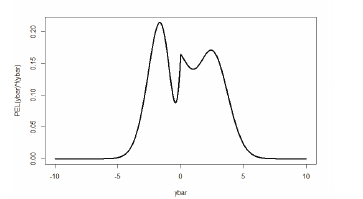
Figure 14 An integrand function with area underneath equal to 1.16